## LLY (Ely Lily) vs NVO (Novo Nordisk) 

In [26]:
import yfinance as yf 
import talib 
from datetime import datetime
from sklearn.model_selection import train_test_split

ticker = "LLY"
start_date = "2010-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date)
data.columns = data.columns.droplevel(1)

data['SMA20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA60'] = talib.EMA(data['Close'], timeperiod=60)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data["MACD"], data["MACD_SIGNAL"], data["MACD_HIST"] = talib.MACD(data["Close"])
data['BB_Low'], data['BB_Mid'], data['BB_High'] = talib.BBANDS(data["Close"], timeperiod=20)
data["ATR"] = talib.ATR(data['High'], data['Close'], data['Low'], timeperiod=14)
data["ADX"] = talib.ADX(data["High"], data["Low"], data["Close"], timeperiod=14)
data["OBV"] = talib.OBV(data["Close"], data["Volume"])

# Momentum Indicators
data['STOCH_K'], data['STOCH_D'] = talib.STOCH(
    data['High'], data['Low'], data['Close'],
    fastk_period=14,
    slowk_period=3, slowk_matype=0,
    slowd_period=3, slowd_matype=0
)

data['CCI_14'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['CCI_20'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=20)

data['WILLR_14'] = talib.WILLR(data['High'], data['Low'], data['Close'], timeperiod=14)

data['MOM_10'] = talib.MOM(data['Close'], timeperiod=10)
data['MOM_14'] = talib.MOM(data['Close'], timeperiod=14)

data['ROC_12'] = talib.ROC(data['Close'], timeperiod=12)

# Trend Strength Indicators
data['ADX_14'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
data['PLUS_DI'] = talib.PLUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['MINUS_DI'] = talib.MINUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)

data['AROONOSC_14'] = talib.AROONOSC(data['High'], data['Low'], timeperiod=14)

# Volume Indicators
data['OBV'] = talib.OBV(data['Close'], data['Volume'])

data['MFI_14'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)

data['AD'] = talib.AD(data['High'], data['Low'], data['Close'], data['Volume'])

data['ADOSC'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], 
                            fastperiod=3, slowperiod=10)

# Other
data['SAR'] = talib.SAR(data['High'], data['Low'], acceleration=0.02, maximum=0.2)

data['NATR_14'] = talib.NATR(data['High'], data['Low'], data['Close'], timeperiod=14)


data['Daily_Return'] = data['Close'].pct_change()
data['nxt_ret'] = data['Daily_Return'].shift(periods=-1)
data = data.dropna()

threshold = 0
data.loc[data['nxt_ret'] >= threshold, 'label'] = 1
data.loc[data['nxt_ret'] < threshold, 'label'] = -1

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_94295/3199372341.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'LLY Heatmap')

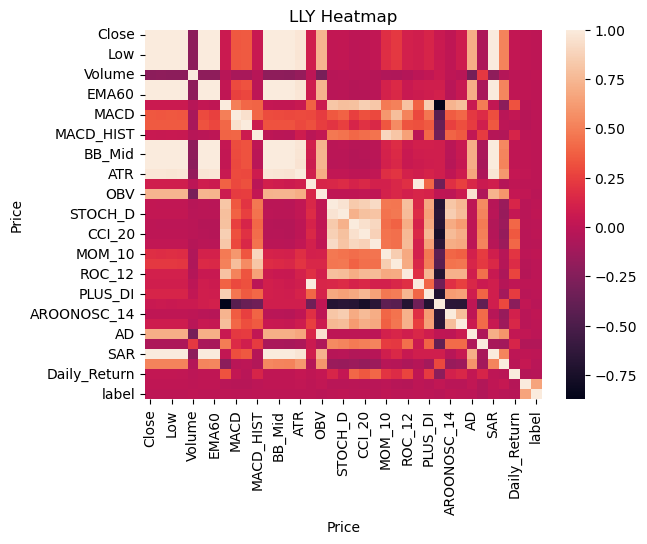

In [27]:
import seaborn as sns 

heatmap = sns.heatmap(data.corr(),annot=False)
heatmap.set_title(f'{ticker} Heatmap')

In [28]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'SMA20', 'EMA60', 'RSI',
       'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'BB_Low', 'BB_Mid', 'BB_High',
       'ATR', 'ADX', 'OBV', 'STOCH_K', 'STOCH_D', 'CCI_14', 'CCI_20',
       'WILLR_14', 'MOM_10', 'MOM_14', 'ROC_12', 'ADX_14', 'PLUS_DI',
       'MINUS_DI', 'AROONOSC_14', 'MFI_14', 'AD', 'ADOSC', 'SAR', 'NATR_14',
       'Daily_Return', 'nxt_ret', 'label'],
      dtype='object', name='Price')

In [29]:
x_col = ['SMA20', 'EMA60', 'RSI', 'MACD', 'MACD_SIGNAL', "MACD_HIST", "BB_Low", "BB_Mid", "BB_High", "ATR", "ADX", "OBV", 'STOCH_K', 'STOCH_D', 'CCI_14', 'CCI_20',
       'WILLR_14', 'MOM_10', 'MOM_14', 'ROC_12', 'ADX_14', 'PLUS_DI',
       'MINUS_DI', 'AROONOSC_14', 'MFI_14', 'AD', 'ADOSC', 'SAR', 'NATR_14', "Daily_Return"]
y_col = 'label'

In [30]:
data.head()

Price,Close,High,Low,Open,Volume,SMA20,EMA60,RSI,MACD,MACD_SIGNAL,...,MINUS_DI,AROONOSC_14,MFI_14,AD,ADOSC,SAR,NATR_14,Daily_Return,nxt_ret,label
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-30,23.872812,23.899410,23.593519,23.613468,7239900,23.745139,23.346712,55.279122,0.186018,0.227124,...,20.486728,57.142857,62.239970,2.166583e+07,-3.362975e+06,24.379722,1.368479,0.012123,0.008914,1.0
2010-03-31,24.085611,24.265157,23.806318,23.852866,9361900,23.808313,23.370938,59.169836,0.191777,0.220055,...,18.482357,50.000000,63.320414,2.370104e+07,-1.788033e+06,24.326964,1.395577,0.008914,-0.001932,-1.0
2010-04-01,24.039066,24.331657,23.965918,24.238560,6248100,23.861844,23.392844,57.981614,0.190391,0.214122,...,17.050381,-35.714286,62.976922,1.995220e+07,-2.174003e+06,23.500426,1.407076,-0.001932,0.011065,1.0
2010-04-05,24.305052,24.584345,24.072309,24.172055,8196400,23.910387,23.422752,62.603295,0.208354,0.212968,...,15.164020,28.571429,63.682287,1.920703e+07,-2.371361e+06,23.517050,1.452520,0.011065,-0.001094,-1.0
2010-04-06,24.278456,24.325007,23.979216,24.198659,7033500,23.962920,23.450808,61.870490,0.217931,0.213961,...,15.989990,28.571429,56.723444,2.434681e+07,-6.011383e+05,23.559742,1.451980,-0.001094,0.000274,1.0


In [31]:
# na check
data.isna().sum()

Price
Close           0
High            0
Low             0
Open            0
Volume          0
SMA20           0
EMA60           0
RSI             0
MACD            0
MACD_SIGNAL     0
MACD_HIST       0
BB_Low          0
BB_Mid          0
BB_High         0
ATR             0
ADX             0
OBV             0
STOCH_K         0
STOCH_D         0
CCI_14          0
CCI_20          0
WILLR_14        0
MOM_10          0
MOM_14          0
ROC_12          0
ADX_14          0
PLUS_DI         0
MINUS_DI        0
AROONOSC_14     0
MFI_14          0
AD              0
ADOSC           0
SAR             0
NATR_14         0
Daily_Return    0
nxt_ret         0
label           0
dtype: int64

In [ ]:
X = data[x_col]
y = data[y_col] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"KNN Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
y_pred_train = gbm.predict(X_train)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Gradient Boosting Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Logistic Regression Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

random = RandomForestClassifier(n_estimators=30,max_depth=5)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
y_pred_train = random.predict(X_train)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"SVM Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

Decision Tree Accuracy: 0.5362563237774031
Decision Tree Train Set Accuracy: 0.5645102999638598
KNN Accuracy: 0.5269814502529511
KNN Train Set Accuracy: 0.617275027105168
Gradient Boosting Accuracy: 0.5227655986509275
Gradient Boosting Train Accuracy: 0.7278641127574991
Logistic Regression Accuracy: 0.5278246205733558
Logistic Regression Train Accuracy: 0.5384893386338996
Random Forest Accuracy: 0.5269814502529511
Random Forest Train Accuracy: 0.6284784965666788
SVM Accuracy: 0.5328836424957841
SVM Train Accuracy: 0.5489700036140224


In [ ]:
# tree algo
import pandas as pd
lly_fi = pd.DataFrame({'name':x_col, 'impo':random.feature_importances_})

lly_fi

,name,impo
0,SMA20,0.029649
1,EMA60,0.028130
2,RSI,0.034795
3,MACD,0.027784
4,MACD_SIGNAL,0.024184
5,MACD_HIST,0.015807
6,BB_Low,0.017808
7,BB_Mid,0.014392
8,BB_High,0.017859
9,ATR,0.030339


feature_importances_ are used for tree-based ML models like RandomForest, GradientBoosting, XGBoost, DecisionTree

In [37]:
# Random Forest
random_feature = pd.Series(random.feature_importances_, index=x_col).nlargest(10)
random_feature

ADOSC           0.085225
MFI_14          0.051742
STOCH_K         0.050939
Daily_Return    0.049608
CCI_14          0.045323
STOCH_D         0.040349
ADX             0.038114
MOM_10          0.037789
MINUS_DI        0.037047
ROC_12          0.035232
dtype: float64

In [38]:
# Gradient Boosting 
gbm_feature = pd.Series(gbm.feature_importances_, index=x_col).nlargest(10)
gbm_feature

ADOSC           0.083209
STOCH_K         0.081339
MFI_14          0.061249
MINUS_DI        0.056719
WILLR_14        0.050317
MACD_HIST       0.049888
NATR_14         0.046022
Daily_Return    0.044800
PLUS_DI         0.040562
MOM_10          0.039992
dtype: float64

In [39]:
# Decision Tree
tree_feature = pd.Series(tree.feature_importances_, index=x_col).nlargest(10)
tree_feature

STOCH_K         0.075548
Daily_Return    0.056055
MINUS_DI        0.054541
PLUS_DI         0.053355
MOM_14          0.052087
ADOSC           0.050532
MFI_14          0.049061
RSI             0.044626
ROC_12          0.041898
MACD_HIST       0.039145
dtype: float64

질문: 0.05~0.07 은 너무 작지 않나요... 

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# corr higher than 0.05 
x_col_filtered = ['ADOSC','MFI_14', 'STOCH_K', 'MINUS_DI', 'WILLR_14', 'PLUS_DI', 'MOM_14', 'Daily_Return']
X = data[x_col_filtered]
y = data[y_col] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"KNN Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
y_pred_train = gbm.predict(X_train)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Gradient Boosting Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100))
# log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Logistic Regression Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

random = RandomForestClassifier(n_estimators=30,max_depth=5)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
y_pred_train = random.predict(X_train)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"SVM Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

Decision Tree Accuracy: 0.5328836424957841
Decision Tree Train Set Accuracy: 0.5659559089266354
KNN Accuracy: 0.49072512647554806
KNN Train Set Accuracy: 0.6292013010480665
Gradient Boosting Accuracy: 0.5008431703204047
Gradient Boosting Train Accuracy: 0.7032887603903144
Logistic Regression Accuracy: 0.5354131534569984
Logistic Regression Train Accuracy: 0.5468015901698591
Random Forest Accuracy: 0.5236087689713322
Random Forest Train Accuracy: 0.627394289844597
SVM Accuracy: 0.5320404721753794
SVM Train Accuracy: 0.5504156125767979


### before filtering x_col 

Decision Tree Accuracy: 0.5362563237774031
Decision Tree Train Set Accuracy: 0.5645102999638598
KNN Accuracy: 0.5269814502529511
KNN Train Set Accuracy: 0.617275027105168
Gradient Boosting Accuracy: 0.5227655986509275
Gradient Boosting Train Accuracy: 0.7278641127574991
Logistic Regression Accuracy: 0.5278246205733558
Logistic Regression Train Accuracy: 0.5384893386338996
Random Forest Accuracy: 0.5269814502529511
Random Forest Train Accuracy: 0.6284784965666788
SVM Accuracy: 0.5328836424957841
SVM Train Accuracy: 0.5489700036140224

# XGBoost

In [58]:
x_col = ['SMA20', 'EMA60', 'RSI', 'MACD', 'MACD_SIGNAL', "MACD_HIST", "BB_Low", "BB_Mid", "BB_High", "ATR", "ADX", "OBV", 'STOCH_K', 'STOCH_D', 'CCI_14', 'CCI_20',
       'WILLR_14', 'MOM_10', 'MOM_14', 'ROC_12', 'ADX_14', 'PLUS_DI',
       'MINUS_DI', 'AROONOSC_14', 'MFI_14', 'AD', 'ADOSC', 'SAR', 'NATR_14', "Daily_Return"]
y_col = 'label'
X = data[x_col]
y = data[y_col]
X_train, X_test, y_train_xgboost, y_test_xgboost = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_xgboost = y_train_xgboost.replace(-1, 0)
y_test_xgboost = y_test_xgboost.replace(-1, 0)

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train, y_train_xgboost)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print(f"XGBoost (Binary) Test Set Prediction: {accuracy_score(y_test_xgboost, y_pred)}")
print(f"XGBoost (Binary) Train Set Prediction: {accuracy_score(y_train_xgboost, y_train_pred)}")

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train_xgboost)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print(f"XGBoost (n_estimator) Test Set Prediction: {accuracy_score(y_test_xgboost, y_pred)}")
print(f"XGBoost (n_estimator) Train Set Prediction: {accuracy_score(y_train_xgboost, y_train_pred)}")

XGBoost (Binary) Test Set Prediction: 0.4974704890387858
XGBoost (Binary) Train Set Prediction: 1.0
XGBoost (n_estimator) Test Set Prediction: 0.4974704890387858
XGBoost (n_estimator) Train Set Prediction: 1.0


accuracy of 1...

In [62]:
# XGBoost Tree
xgboost_feature = pd.Series(xgb.feature_importances_, index=x_col).nlargest(10)
xgboost_feature

MOM_10         0.042777
EMA60          0.040865
BB_Low         0.040091
ROC_12         0.040062
AROONOSC_14    0.040046
STOCH_K        0.039188
AD             0.037692
NATR_14        0.037201
ADOSC          0.037005
MACD_HIST      0.036960
dtype: float32

In [63]:
x_col_xgb = ['MOM_10', 'EMA60', 'BB_Low', 'ROC_12', 'AROONOSC_14', 'STOCH_K', 'AD', 'NATR_14', 'ADOSC', 'MACD_HIST']

In [64]:
X = data[x_col_xgb]
y = data[y_col] 
X_train, X_test, y_train_xgboost, y_test_xgboost = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_xgboost = y_train_xgboost.replace(-1, 0)
y_test_xgboost = y_test_xgboost.replace(-1, 0)

xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train, y_train_xgboost)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print(f"XGBoost (Binary) Test Set Prediction (Feature Importance): {accuracy_score(y_test_xgboost, y_pred)}")
print(f"XGBoost (Binary) Train Set Prediction (Feature Importance): {accuracy_score(y_train_xgboost, y_train_pred)}")

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train_xgboost)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print(f"XGBoost (n_estimator) Test Set Prediction (Feature Importance): {accuracy_score(y_test_xgboost, y_pred)}")
print(f"XGBoost (n_estimator) Train Set Prediction (Feature Importance): {accuracy_score(y_train_xgboost, y_train_pred)}")

XGBoost (Binary) Test Set Prediction (Feature Importance): 0.5101180438448567
XGBoost (Binary) Train Set Prediction (Feature Importance): 0.9945789663895916
XGBoost (n_estimator) Test Set Prediction (Feature Importance): 0.5101180438448567
XGBoost (n_estimator) Train Set Prediction (Feature Importance): 0.9945789663895916


difference between Test and Train is less compared when using all features

In [65]:
# get more features (ta-lib)
# feature importance -> delete 
# S&P, rival company, friends company (which is same industry) stock price 

In [67]:
# Competitor 
ticker = "NVO"
start_date = "2010-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date)
data.columns = data.columns.droplevel(1)

data['SMA20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA60'] = talib.EMA(data['Close'], timeperiod=60)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data["MACD"], data["MACD_SIGNAL"], data["MACD_HIST"] = talib.MACD(data["Close"])
data['BB_Low'], data['BB_Mid'], data['BB_High'] = talib.BBANDS(data["Close"], timeperiod=20)
data["ATR"] = talib.ATR(data['High'], data['Close'], data['Low'], timeperiod=14)
data["ADX"] = talib.ADX(data["High"], data["Low"], data["Close"], timeperiod=14)
data["OBV"] = talib.OBV(data["Close"], data["Volume"])

# Momentum Indicators
data['STOCH_K'], data['STOCH_D'] = talib.STOCH(
    data['High'], data['Low'], data['Close'],
    fastk_period=14,
    slowk_period=3, slowk_matype=0,
    slowd_period=3, slowd_matype=0
)

data['CCI_14'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['CCI_20'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=20)

data['WILLR_14'] = talib.WILLR(data['High'], data['Low'], data['Close'], timeperiod=14)

data['MOM_10'] = talib.MOM(data['Close'], timeperiod=10)
data['MOM_14'] = talib.MOM(data['Close'], timeperiod=14)

data['ROC_12'] = talib.ROC(data['Close'], timeperiod=12)

# Trend Strength Indicators
data['ADX_14'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
data['PLUS_DI'] = talib.PLUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['MINUS_DI'] = talib.MINUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)

data['AROONOSC_14'] = talib.AROONOSC(data['High'], data['Low'], timeperiod=14)

# Volume Indicators
data['OBV'] = talib.OBV(data['Close'], data['Volume'])

data['MFI_14'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)

data['AD'] = talib.AD(data['High'], data['Low'], data['Close'], data['Volume'])

data['ADOSC'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], 
                            fastperiod=3, slowperiod=10)

# Other
data['SAR'] = talib.SAR(data['High'], data['Low'], acceleration=0.02, maximum=0.2)

data['NATR_14'] = talib.NATR(data['High'], data['Low'], data['Close'], timeperiod=14)


data['Daily_Return'] = data['Close'].pct_change()
data['nxt_ret'] = data['Daily_Return'].shift(periods=-1)
data = data.dropna()

threshold = 0
data.loc[data['nxt_ret'] >= threshold, 'label'] = 1
data.loc[data['nxt_ret'] < threshold, 'label'] = -1

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_94295/2629897104.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'NVO Heatmap')

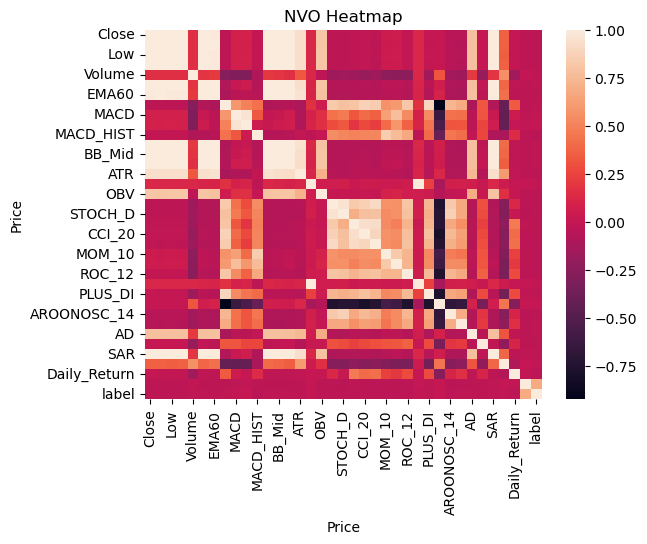

In [68]:
heatmap = sns.heatmap(data.corr(),annot=False)
heatmap.set_title(f'{ticker} Heatmap')

In [69]:
X = data[x_col]
y = data[y_col] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"{ticker} ML Results: ")

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"KNN Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
y_pred_train = gbm.predict(X_train)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Gradient Boosting Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Logistic Regression Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

random = RandomForestClassifier(n_estimators=30,max_depth=5)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
y_pred_train = random.predict(X_train)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"SVM Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

NVO ML Results: 
Decision Tree Accuracy: 0.5256950294860994
Decision Tree Train Set Accuracy: 0.5533068305023491
KNN Accuracy: 0.5181128896377422
KNN Train Set Accuracy: 0.6573906758221901
Gradient Boosting Accuracy: 0.527379949452401
Gradient Boosting Train Accuracy: 0.7668955547524394
Logistic Regression Accuracy: 0.5214827295703454
Logistic Regression Train Accuracy: 0.5247560534875316
Random Forest Accuracy: 0.535804549283909
Random Forest Train Accuracy: 0.6591976870256595
SVM Accuracy: 0.5172704296545914
SVM Train Accuracy: 0.533429707264185


In [70]:
nvo_fi = pd.DataFrame({'name':x_col, 'impo':random.feature_importances_})

nvo_fi

,name,impo
0,SMA20,0.025059
1,EMA60,0.016643
2,RSI,0.025424
3,MACD,0.045923
4,MACD_SIGNAL,0.036213
5,MACD_HIST,0.042899
6,BB_Low,0.024592
7,BB_Mid,0.019599
8,BB_High,0.027624
9,ATR,0.018814
